In [1]:
#standard ds imports
import pandas as pd
import numpy as np
#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# .py imports
from env import user, pwd,host
import env
import wrangle_zillower as wz
import wranglerer
import os
#sklearn imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

local version found!


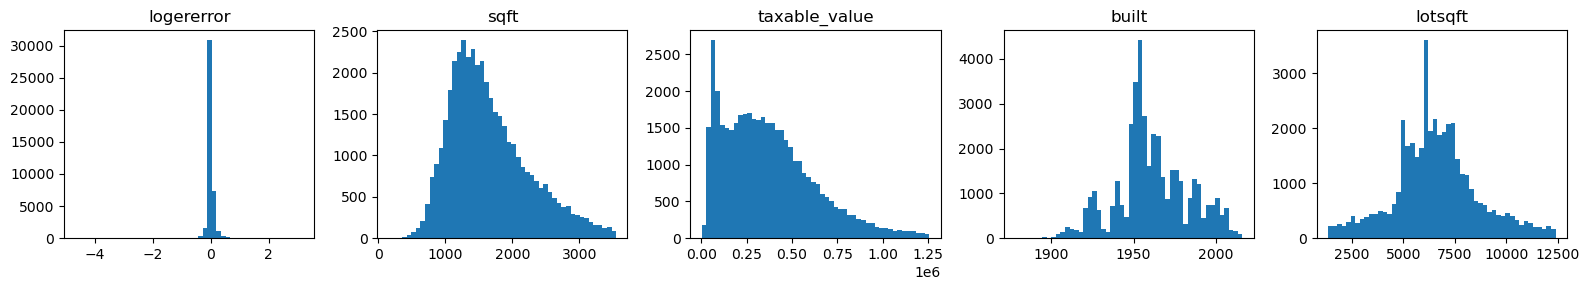

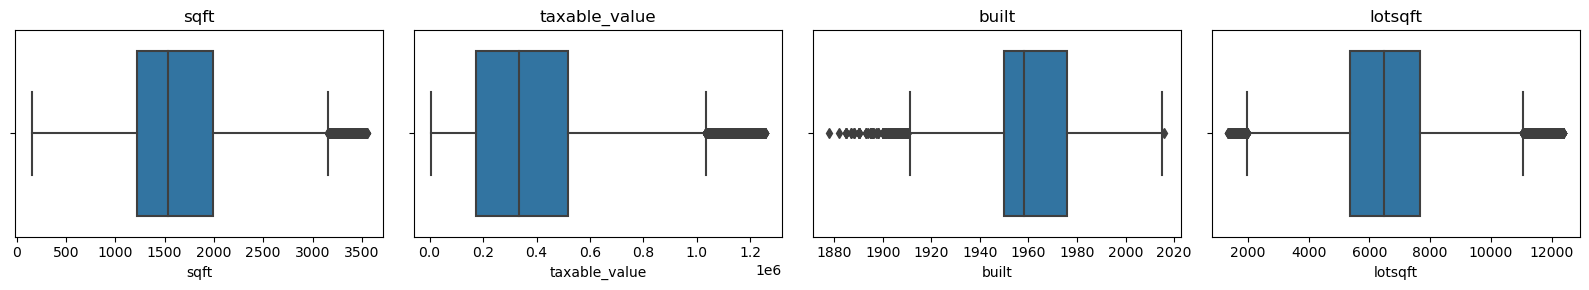

In [2]:
train,validate,test = wz.wrangle_zillow()
train['fips'] = train.fips.astype(int).astype(object)
train['beds'] = train.beds.astype(int)

In [3]:
train.shape

(23136, 9)

In [4]:
train = wranglerer.handle_missing_values(train,prop_required_columns=1,prop_required_rows=1)
validate = wranglerer.handle_missing_values(validate,prop_required_columns=1,prop_required_rows=1)
test = wranglerer.handle_missing_values(test,prop_required_columns=1,prop_required_rows=1)

In [5]:
train.shape

(23136, 9)

In [6]:
wranglerer.nulls_by_row(validate)

,num_cols_missing,percent_cols_missing
42498,0,0.0
25863,0,0.0
41392,0,0.0
27142,0,0.0
47269,0,0.0
...,...,...
8206,0,0.0
19324,0,0.0
46737,0,0.0
48516,0,0.0


In [7]:
train['log_error'] = train['logererror']
train.drop(columns='logererror',inplace=True)
train.head()

,beds,baths,sqft,taxable_value,built,lotsqft,fips,city,log_error
1847,4,1.5,1016.0,319266.0,1953.0,6050.0,6059,47568.0,-0.047223
49580,5,3.0,3000.0,305487.0,2005.0,6674.0,6037,5534.0,-0.016489
37700,2,1.0,1194.0,232682.0,1949.0,6702.0,6037,24174.0,-0.010695
26686,3,2.0,1706.0,92573.0,1951.0,5974.0,6037,118225.0,-0.031570
20095,3,2.0,1541.0,294404.0,1946.0,6202.0,6037,12447.0,0.202433


In [8]:
train.head()

,beds,baths,sqft,taxable_value,built,lotsqft,fips,city,log_error
1847,4,1.5,1016.0,319266.0,1953.0,6050.0,6059,47568.0,-0.047223
49580,5,3.0,3000.0,305487.0,2005.0,6674.0,6037,5534.0,-0.016489
37700,2,1.0,1194.0,232682.0,1949.0,6702.0,6037,24174.0,-0.010695
26686,3,2.0,1706.0,92573.0,1951.0,5974.0,6037,118225.0,-0.031570
20095,3,2.0,1541.0,294404.0,1946.0,6202.0,6037,12447.0,0.202433


In [9]:
train.log_error.describe()

count    23136.000000
mean         0.015062
std          0.162281
min         -4.453964
25%         -0.025210
50%          0.005198
75%          0.035823
max          3.100913
Name: log_error, dtype: float64

In [10]:
train.beds.value_counts()

3    11322
4     6327
2     4154
5     1077
1      256
Name: beds, dtype: int64

In [11]:
print(f'OVERALL MEAN {round(train.log_error.mean(),6)}')
print(train.groupby('beds')['log_error'].mean())

OVERALL MEAN 0.015062
beds
1    0.033973
2    0.010216
3    0.013184
4    0.019168
5    0.024882
Name: log_error, dtype: float64


(-1.0, 1.0)

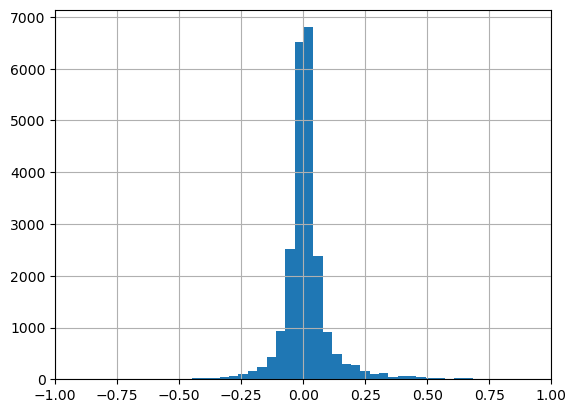

In [12]:
train.log_error.hist(bins=200)
plt.xlim(-1,1)

# START HERE

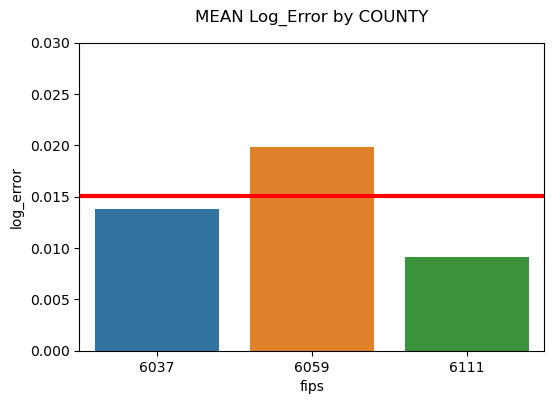

In [13]:
mean = train.log_error.mean()
plt.figure(figsize=(6,4))
sns.barplot(data=train, y='log_error',x='fips',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Log_Error by COUNTY',pad=15)
plt.ylim(0,.03)
plt.show()

In [14]:
#output each mean and overall mean:
print(f'OVERALL: {round(train.log_error.mean(),4)}')
print(f'LA CNTY: {round(train[train.fips == 6037].log_error.mean(),4)}')
print(f'ORANGE CNTY: {round(train[train.fips == 6059].log_error.mean(),4)}')
print(f'VENTURA CNTY: {round(train[train.fips == 6111].log_error.mean(),4)}')

OVERALL: 0.0151
LA CNTY: 0.0138
ORANGE CNTY: 0.0198
VENTURA CNTY: 0.0091


# LA County Mean vs Overall Mean
## Does a statistically significant difference exist between mean log_error in LA CNTY and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean log_error in LA County and the mean of all counties.
- ${H_a}$: A statistically significant difference exists between mean log_error in LA County and the mean of all counties.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [15]:
α = 0.05
lacnty_log_err = train[train.fips == 6037].log_error
overall_mean = train.log_error.mean()
t, p = stats.ttest_1samp(lacnty_log_err,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

-0.9454724459724504 0.34443287603589035 0.05
p = 3.444329e-01


# with a p-value GREATER than alpha, FAIL to reject the NULL
### A statistically significant difference DOES NOT exist, there is INSUFFICIENT EVIDENCE to suggest that the two samples were drawn from two distinct distributions.

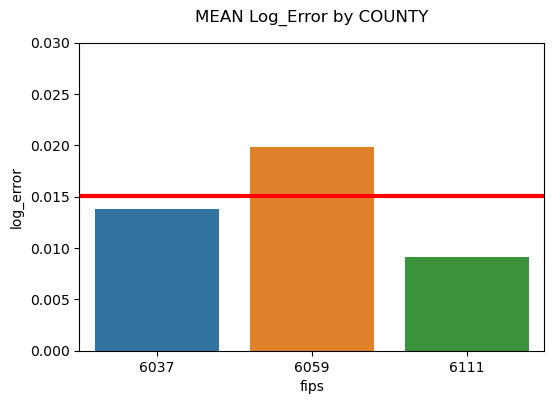

In [16]:
mean = train.log_error.mean()
plt.figure(figsize=(6,4))
sns.barplot(data=train, y='log_error',x='fips',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Log_Error by COUNTY',pad=15)
plt.ylim(0,.03)
plt.show()

# Orange County Mean vs Overall Mean
## Does a statistically significant difference exist between mean log_error in Orange CNTY and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean log_error in Orange County and the mean of all counties.
- ${H_a}$: A statistically significant difference exists between mean log_error in Orange County and the mean of all counties.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [17]:
α = 0.05
orangecnty_log_err = train[train.fips == 6059].log_error
overall_mean = train.log_error.mean()
t, p = stats.ttest_1samp(orangecnty_log_err,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

2.1753279403856336 0.02964334078322345 0.05
p = 2.964334e-02


# with a p-value LESS than alpha, REJECT the NULL
### A statistically significant difference exists, there is SUFFICIENT EVIDENCE to suggest that the two samples were drawn from two distinct distributions.

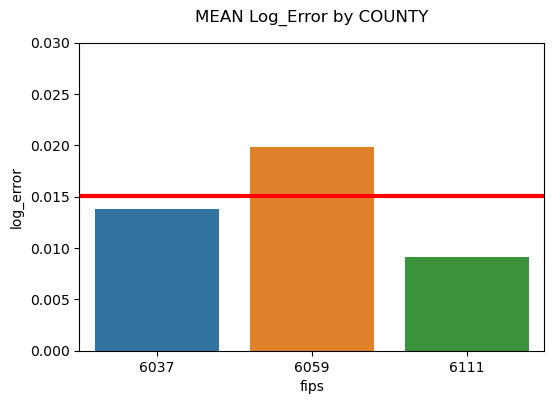

In [18]:
mean = train.log_error.mean()
plt.figure(figsize=(6,4))
sns.barplot(data=train, y='log_error',x='fips',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Log_Error by COUNTY',pad=15)
plt.ylim(0,.03)
plt.show()

# Ventura County Mean vs Overall Mean
## Does a statistically significant difference exist between mean log_error in Ventura CNTY and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean log_error in Ventura County and the mean of all counties.
- ${H_a}$: A statistically significant difference exists between mean log_error in Ventura County and the mean of all counties.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [19]:
α = 0.05
ventcnty_log_err = train[train.fips == 6111].log_error
overall_mean = train.log_error.mean()
t, p = stats.ttest_1samp(ventcnty_log_err,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

-1.684909388987832 0.09217282398249296 0.05
p = 9.217282e-02


# with a p-value GREATER than alpha, FAIL to reject the NULL
### A statistically significant difference DOES NOT exist, there is INSUFFICIENT EVIDENCE to suggest that the two samples were drawn from two distinct distributions.

In [20]:
train.beds.value_counts()

3    11322
4     6327
2     4154
5     1077
1      256
Name: beds, dtype: int64

In [21]:
print(f'OVERALL MEAN {round(train.log_error.mean(),6)}')
print(train.groupby('beds')['log_error'].mean())

OVERALL MEAN 0.015062
beds
1    0.033973
2    0.010216
3    0.013184
4    0.019168
5    0.024882
Name: log_error, dtype: float64


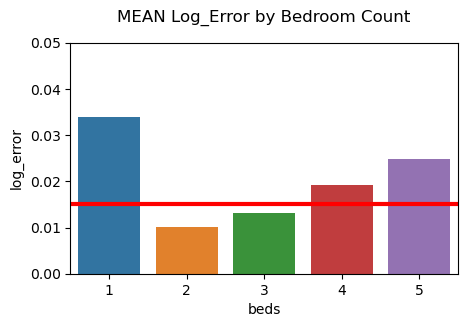

In [22]:
mean = train.log_error.mean()
plt.figure(figsize=(5,3))
sns.barplot(data=train, y='log_error',x='beds',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Log_Error by Bedroom Count',pad=15)
plt.ylim(0,.05)
plt.show()

In [23]:
train.beds.value_counts()

3    11322
4     6327
2     4154
5     1077
1      256
Name: beds, dtype: int64

## 3-Bedroom Properties Mean vs Overall Mean
## Does a statistically significant difference exist between mean log_error for 3-Bedroom Properties and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean log_error for 3-Bedroom Properties and the mean of all Properties.
- ${H_a}$: A statistically significant difference exists between mean log_error for 3-Bedroom Properties and the mean of all Properties.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [24]:
α = 0.05
threebed_log_err = train[train.beds == 3].log_error
overall_mean = train.log_error.mean()
t, p = stats.ttest_1samp(threebed_log_err,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

-1.2661282335603254 0.20549322822152316 0.05
p = 2.054932e-01


# with a p-value GREATER than alpha, FAIL to reject the NULL
### A statistically significant difference DOES NOT exist, there is INSUFFICIENT EVIDENCE to suggest that the two samples were drawn from two distinct distributions.

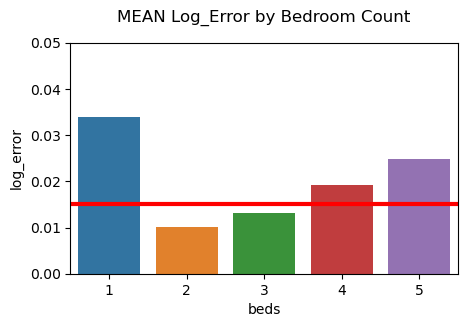

In [25]:
mean = train.log_error.mean()
plt.figure(figsize=(5,3))
sns.barplot(data=train, y='log_error',x='beds',ci=False)
plt.axhline(y=mean,color='red', linewidth=3)
plt.title('MEAN Log_Error by Bedroom Count',pad=15)
plt.ylim(0,.05)
plt.show()

In [26]:
train.beds.value_counts()

3    11322
4     6327
2     4154
5     1077
1      256
Name: beds, dtype: int64

## 1-Bedroom Properties Mean vs Overall Mean
## Does a statistically significant difference exist between mean log_error for 1-Bedroom Properties and that of the OVERALL sample?
### T-Test Independence 1-sample, 2-tail

### Hypothesis

- ${H_0}$: No statistically significant difference exists between mean log_error for 1-Bedroom Properties and the mean of all Properties.
- ${H_a}$: A statistically significant difference exists between mean log_error for 1-Bedroom Properties and the mean of all Properties.

#### Two-tailed, One-Sample T-Test ANY DIFF in mean between a subset and overall

In [27]:
α = 0.05
onebed_log_err = train[train.beds == 1].log_error
overall_mean = train.log_error.mean()
t, p = stats.ttest_1samp(onebed_log_err,overall_mean)
print(t,p,α)
print(f'p = {p:e}')

1.0341236433787115 0.3020580891350584 0.05
p = 3.020581e-01


# with a p-value GREATER than alpha, FAIL to reject the NULL
### A statistically significant difference DOES NOT exist, there is INSUFFICIENT EVIDENCE to suggest that the two samples were drawn from two distinct distributions.

In [28]:
train[train.beds == 1].mean()

beds                  1.000000
baths                 1.097656
sqft                786.394531
taxable_value    282727.457031
built              1934.406250
lotsqft            4932.894531
fips               6042.898438
city              37375.109375
log_error             0.033973
dtype: float64